# 开发环境

In [79]:
#%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import sys 
print('python版本：')
print(sys.version) 
print(sys.version_info)

python版本：
3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 11:27:44) [MSC v.1900 64 bit (AMD64)]
sys.version_info(major=3, minor=6, micro=6, releaselevel='final', serial=0)


# 数据探索

#### 获得20类新闻包的数据集

In [80]:
# 数据加载
from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets import get_data_home
from pprint import pprint

#sklearn.datasets.fetch_20newsgroups(data_home=None, subset=’train’, categories=None, shuffle=True, random_state=42, remove=(), download_if_missing=True)

#fetch_20newsgroups(shuffle = True, random_state = 42)
newsgroups_data  = fetch_20newsgroups(subset = 'all', shuffle = True, random_state = 42)
newsgroups_train = fetch_20newsgroups(subset = 'train', shuffle = True, random_state = 42)
newsgroups_test = fetch_20newsgroups(subset='test', shuffle = True, random_state = 42)


了解数据集总的大小，测试集，训练集的大小

In [81]:
print('datasets path: ', get_data_home(data_home=None))
print('news all data length:',len(newsgroups_data.data))
print('news train data length:',len(newsgroups_train.data))
print('news test data length:',len(newsgroups_test.data))


datasets path:  C:\Users\ASUS\scikit_learn_data
news all data length: 18846
news train data length: 11314
news test data length: 7532


数据集大小：    
数据集共有18846条记录  
训练集有11314条记录 
测试集共有18846条记录   

了解数据的属性

In [82]:
pprint(list(newsgroups_data.target_names))
print('newsgroups_data category numbers:',len(list(newsgroups_data.target_names)))
print('newsgroups_data target_names length:', len(newsgroups_data.target_names))#same
print('newsgroups_data category->target', newsgroups_data.target)
print('top 10 target', newsgroups_data.target[:10])
print('top 10 filenames', newsgroups_data.filenames[:10])

print('----------------------------------content------0---------------------------------------')
print('newsgroups_data top 1: ', newsgroups_data.data[0])
print('----------------------------------content------1---------------------------------------')
print('newsgroups_data top 1: ', newsgroups_data.data[1])

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
newsgroups_data category numbers: 20
newsgroups_data target_names length: 20
newsgroups_data category->target [10  3 17 ...  3  1  7]
top 10 target [10  3 17  3  4 12  4 10 10 19]
top 10 filenames ['C:\\Users\\ASUS\\scikit_learn_data\\20news_home\\20news-bydate-test\\rec.sport.hockey\\54367'
 'C:\\Users\\ASUS\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.ibm.pc.hardware\\60215'
 'C:\\Users\\ASUS\\scikit_learn_data\\20news_home\\20news-bydate-train\\talk.politics.mideast\\76120'
 'C:\\Users\\ASUS\\scikit_learn_data\\20news_home\\20news-bydate-test\\comp.sys.ibm.pc.

数据集中，target_names表示，新闻类别。    
数据集中，target表示：每个新闻的类别id;    
数据集中，data 表示：每个新闻包含的内容，分为 headers， footers， quotes，这三部分     
数据集中，filenames表示： 每个新闻的文件名    
根据输出：当前新闻有20个类别；   
subset，子类类型，用来设定数据类型：可以设置train，test，all。      
category，类别，就是数据集新闻的类型； 如果设置成None， 会加载所有的categories。    
remove， 删除新闻的部分内容，主要包括 headers， footers， quotes，这三部分 ;本项目种，header 不删除，只删除footers和quotes，因为发现headers总包含了keywords，这个特征很重要。
shuffle 和random_state这两个要结合起来用。   


In [83]:
from collections import Counter
news_cnt = Counter()
for temp in newsgroups_data.target:
    news_cnt[temp] += 1

print(news_cnt)    
string = ''
for i in range(20):
#     print(str(i))
    string = string + str(i) + ': ' +  str(news_cnt[i])  + '   '

print(string)


Counter({10: 999, 15: 997, 8: 996, 9: 994, 11: 991, 13: 990, 7: 990, 5: 988, 14: 987, 2: 985, 12: 984, 3: 982, 6: 975, 1: 973, 4: 963, 17: 940, 16: 910, 0: 799, 18: 775, 19: 628})
0: 799   1: 973   2: 985   3: 982   4: 963   5: 988   6: 975   7: 990   8: 996   9: 994   10: 999   11: 991   12: 984   13: 990   14: 987   15: 997   16: 910   17: 940   18: 775   19: 628   


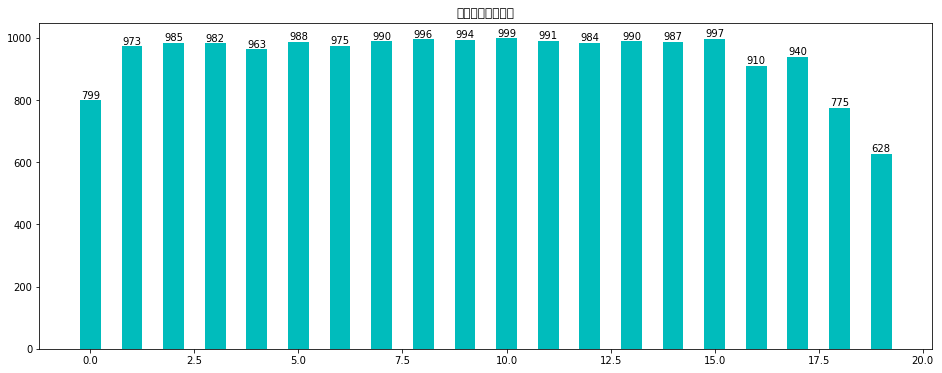

In [84]:
inputx = np.arange(20)
inputy =[] #np.random.randint(0,30,20)
for i in inputx:
    inputy.append(news_cnt[i])
    
# plt.legend((rect,),(u"图例",))

# 添加数据标签
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
#         print(height, rect.get_width())
        plt.text(rect.get_x()+rect.get_width()/2., height, (height), ha='center', va='bottom')
  
plt.figure(figsize=(16,6))
rect = plt.bar(inputx, inputy, 0.5, color='#00BCBC')
plt.title(u"不同新闻数量展示")
# plt.show() #如果add_labels使用后，这里 open打开后，出错
add_labels(rect)


 所有新闻的长度信息如下：
 

min 数为: 115
max 数为: 160616
mean 数为: 1902.5258940889314
median 数为: 1175.0


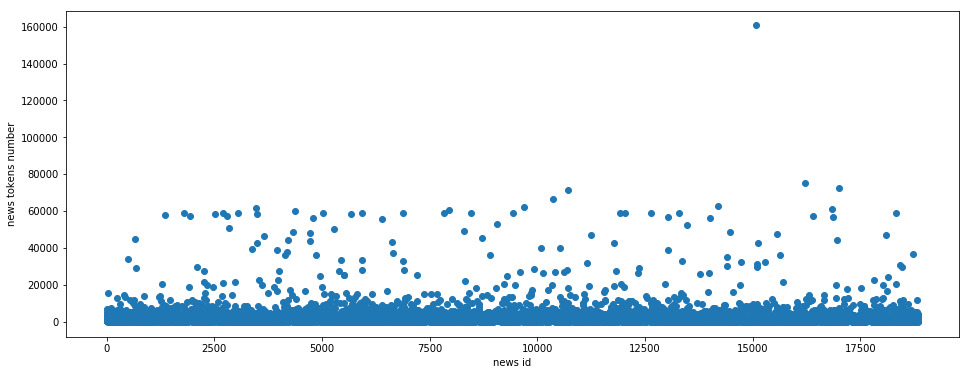

In [85]:
lengths_newsgroups_data = []
for (idx) in range(len(newsgroups_data.data)):
    lengths_newsgroups_data.append(len(newsgroups_data.data[idx]))
#print(len_news_data)
print('min 数为:', np.min(lengths_newsgroups_data))
print('max 数为:', np.max(lengths_newsgroups_data))
print('mean 数为:', np.mean(lengths_newsgroups_data))
print('median 数为:', np.median(lengths_newsgroups_data))


sinputx = np.arange(len(lengths_newsgroups_data))
sinputy = lengths_newsgroups_data
# print(sinputx)
plt.figure(figsize=(16,6))
plt.scatter(sinputx, sinputy)
plt.xlabel(u"news id")
plt.ylabel(u"news tokens number")
plt.show()

291 0.015440942375039797


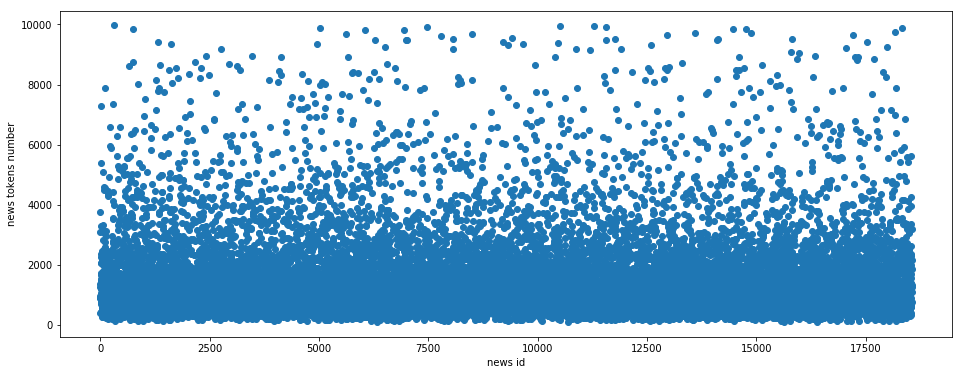

In [86]:
lenghts_lessthan10000 = []
others =[]
for length in lengths_newsgroups_data:
    if length < 10000:
        lenghts_lessthan10000.append(length)
    else:
        others.append(length)
        
print(len(others), len(others)/len(lengths_newsgroups_data))
sinputx1 = np.arange(len(lenghts_lessthan10000))
sinputy1 = lenghts_lessthan10000
# print(sinputx)
plt.figure(figsize=(16,6))
plt.scatter(sinputx1, sinputy1)
plt.xlabel(u"news id")
plt.ylabel(u"news tokens number")
plt.show()

In [87]:
# dic = {'0':0, '1':0, '2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0,'9':0,'10':0,'11':0,'12':0,'13':0,'14':0,'15':0,'16':0,'17':0,'18':0,'19':0}
# for index, tid in enumerate(newsgroups_data.target):
#     for i in range(20):
#         #print(i, tid)
#         dic[str(tid)]= 0
#         if tid == i:
#             #print (index)
#             #print(newsgroups_data.data[index])
#             number = len(newsgroups_data.data[index])
#             dic[str(tid)] = dic[str(tid)]+ number
                
# for i in range(20):
#     print( dic[str(i)]) 

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
categories = None # ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

newsgroup_4cat_train = fetch_20newsgroups(subset='train', categories=None)
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroup_4cat_train.data)
vectors.shape


(11314, 130107)

提取的TF-IDF向量非常稀疏，在130000维以上的空间中平均有158个非零分量（小于0.5％的非零特征）：

In [89]:
vectors.nnz / float(vectors.shape[0])

157.9958458546933

In [90]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
#newsgroups_test = fetch_20newsgroups(subset='test',categories=categories)
vectors_test = vectorizer.transform(newsgroups_test.data)
clf = MultinomialNB(alpha=.01)
clf.fit(vectors, newsgroups_train.target)
pred = clf.predict(vectors_test)
metrics.f1_score(newsgroups_test.target, pred, average='macro')

0.8290659644474043

In [91]:
import numpy as np
def show_top10(classifier, vectorizer, categories):
     feature_names = np.asarray(vectorizer.get_feature_names())
     for i, category in enumerate(categories):
         top10 = np.argsort(classifier.coef_[i])[-10:]
         print("%s: %s" % (category, " ".join(feature_names[top10])))

show_top10(clf, vectorizer, newsgroups_train.target_names)

alt.atheism: keith it and you in that is to of the
comp.graphics: edu in for it is and graphics of to the
comp.os.ms-windows.misc: file for of and edu is it to the windows
comp.sys.ibm.pc.hardware: card ide is of it drive and scsi to the
comp.sys.mac.hardware: in it is and of edu apple mac to the
comp.windows.x: it mit in motif and is of window to the
misc.forsale: shipping offer of 00 to and edu the for sale
rec.autos: that is you it in of and to car the
rec.motorcycles: dod you it com in of and bike to the
rec.sport.baseball: that is baseball and of in to he edu the
rec.sport.hockey: ca game he team and hockey of in to the
sci.crypt: chip that encryption is and clipper key of to the
sci.electronics: for edu you it in is and of to the
sci.med: edu pitt that it in and is to of the
sci.space: it that is nasa in and to of space the
soc.religion.christian: we it in and is god that to of the
talk.politics.guns: it is you that gun and in of to the
talk.politics.mideast: is you israeli that 

In [92]:
newsgroups_test = fetch_20newsgroups(subset='test',
                                      remove=('footers', 'quotes'),
                                      categories=categories)
vectors_test = vectorizer.transform(newsgroups_test.data)
pred = clf.predict(vectors_test)
metrics.f1_score(pred, newsgroups_test.target, average='macro')


0.7847088064846031

In [93]:
newsgroups_train = fetch_20newsgroups(subset='train',
                                       remove=('footers', 'quotes'),
                                       categories=categories)
vectors = vectorizer.fit_transform(newsgroups_train.data)
clf = MultinomialNB(alpha=.01)
clf.fit(vectors, newsgroups_train.target)
vectors_test = vectorizer.transform(newsgroups_test.data)
pred = clf.predict(vectors_test)
metrics.f1_score(newsgroups_test.target, pred, average='macro')

0.7779570685743328

在评估20个新闻组数据上的文本分类器时，应该删除与新闻组相关的元数据。在scikit-learn中，可以通过设置remove=('headers', 'footers', 'quotes')来完成此操作。F分数会降低，因为它更加真实。 [参考： http://scikit-learn.org/stable/datasets/twenty_newsgroups.html]

# 数据预处理

分词处理

In [94]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [95]:
#add my stop words
# 参考【https://blog.csdn.net/shijiebei2009/article/details/39696523】
import os
# f = open("c://cc://stopwords891","r") 
# lines = f.readlines()      #读取全部内容 ，并以列表方式返回
# for line in lines:
#     print(line) 
mystop_words = []
f = open("stopwords891.txt")               # 返回一个文件对象 
line = f.readline()               # 调用文件的 readline()方法 
while line:   
    #print(line)                   # 后面跟 ',' 将忽略换行符    
    #print(line, end = '')　      # 在 Python 3 中使用    
    line = f.readline()
    line =line.strip('\n') 
    mystop_words.append(line)
f.close()  

print(mystop_words[-10:])
print(len(mystop_words))

['your', 'youre', 'yours', 'yourself', 'yourselves', 'z', 'zero', 'zt', 'zz', '']
891


In [96]:
newsgroups_all_rm3p = fetch_20newsgroups(subset='all',
                                       remove=('footers', 'quotes'),
                                       categories=None, shuffle = True, random_state = 42)
print('newsgroups_data origin top 1: ', newsgroups_data.data[0])
print('--------------------------------after remove footers, quotes--------------------------------------------')
print('newsgroups_data remove 3 parts top 1: ', newsgroups_all_rm3p.data[0])

newsgroups_data origin top 1:  From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


--------------------------------after remove footers, quotes------

In [97]:
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,stop_words='english')
X_train = vectorizer.fit_transform(newsgroups_train.data)
print("n_samples: %d, n_features: %d" % X_train.shape)
#print(X_train[0])
X_test = vectorizer.transform(newsgroups_test.data)
print("n_samples: %d, n_features: %d" % X_test.shape)
feature_names = vectorizer.get_feature_names()
#print(feature_names)

n_samples: 11314, n_features: 98925
n_samples: 7532, n_features: 98925


In [98]:
print(vectorizer)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=True,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)


In [99]:
from collections import Counter
def get_numbers(news_tokens):
    alltokens = []
    for tokens in news_tokens:
        for token in tokens:
            alltokens.append(token) 
            
    print(Counter(alltokens).most_common(20))        
    return len(Counter(alltokens))
   
    #print('特征数： ',len(Counter(alltokens)))

In [100]:
def get_top_tokens(news_tokens, number):
    alltokens = []
    for tokens in news_tokens:
        for token in tokens:
            alltokens.append(token) 
              
    return Counter(alltokens).most_common(number)

In [101]:
import matplotlib as mpl
import matplotlib.pyplot as plt
def bar_of_news_dict(cnt):
    name_list = []
    num_list = []
    for (key,value) in cnt:
        name_list.append(key)
        num_list.append(value)

    font_size = 10 # 字体大小
    fig_size = (16, 6) # 图表大小

    # 更新字体大小
    mpl.rcParams['font.size'] = font_size
    # 更新图表大小
    mpl.rcParams['figure.figsize'] = fig_size
    # 设置柱形图宽度
    bar_width = 0.5

    index = np.arange(20)
    # 绘制 train
    rects = plt.bar(index, num_list, bar_width, color='#00BCBC')
    # X轴标题
    plt.xticks(index, name_list)
    # Y轴范围
    #plt.ylim(ymax=100, ymin=0)
    # 图表标题
    plt.title('news tokens top 20')
    # 图例显示在图表下方
    #plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, ncol=5)

    # 添加数据标签
    def add_labels(rects):
        for rect in rects:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')
            # 柱形图边缘用白色填充，纯粹为了美观
            rect.set_edgecolor('white')

    add_labels(rects)


In [102]:
print(Counter(feature_names).most_common(10))

[('00', 1), ('000', 1), ('0000', 1), ('00000', 1), ('000000', 1), ('00000000', 1), ('0000000004', 1), ('00000000b', 1), ('00000001', 1), ('00000001b', 1)]


In [103]:
from nltk import word_tokenize
news_tokens = [word_tokenize(temp) for temp in newsgroups_data.data]
number = get_numbers(news_tokens)
print('开始全部的特征数： ', number)
token_1 = number

[('>', 265526), (',', 263524), ('.', 237655), ('the', 213304), (':', 185878), ('--', 178752), ('to', 117989), (')', 113315), ('of', 111837), ('(', 110932), ('a', 94137), ('and', 89835), ('@', 87913), ('I', 80778), ('is', 68168), ('in', 63841), ('that', 62026), ("'AX", 61717), ('?', 55446), ("''", 50561)]
开始全部的特征数：  284113


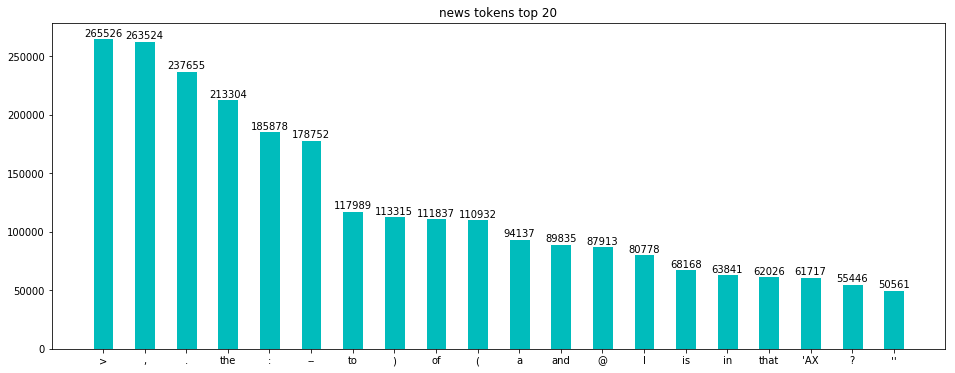

In [104]:
bar_of_news_dict(get_top_tokens(news_tokens, 20))

In [105]:
news_tokens = [word_tokenize(temp) for temp in newsgroups_all_rm3p.data]

In [106]:
number = get_numbers(news_tokens)
print('删除footer和quotes后，剩余特征数： ', number)
token_2 = number

[(',', 189603), ('.', 170483), ('the', 154510), (':', 150482), ('--', 87763), ('to', 85044), ('of', 82583), (')', 73822), ('(', 71068), ('and', 67009), ('a', 66184), ('I', 54369), ('is', 48143), ('in', 46939), ('that', 43524), ('@', 39108), ('?', 34143), ('for', 31623), ("''", 31020), ('it', 30808)]
删除footer和quotes后，剩余特征数：  221083


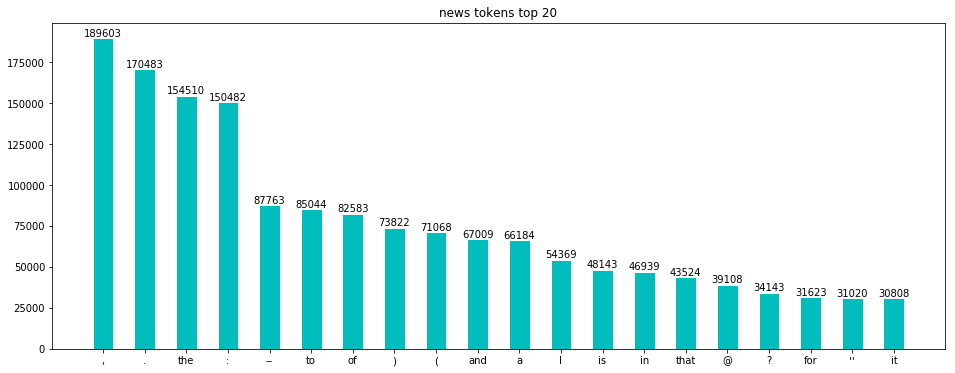

In [107]:
bar_of_news_dict(get_top_tokens(news_tokens, 20))

删除标点符号，特殊符号，数字


In [108]:
import re
def get_useful_data(text):
    text = text.replace('\n'," ") #删掉空行 
    text = text.replace('\'AX'," ") #删掉'AX 
    text = re.sub(r"-", " ", text) #把 "-" 的单词分为两个
    text = re.sub(r"\d+/\d+/\d+", "", text) #删掉日期  
    text = re.sub(r"[0-2]?[0-9]:[0-6][0-9]", "", text) #删掉时间  
    text = re.sub(r"[\.\w]+@[\.\w]+", "", text) #删掉邮箱地址  
    text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*,]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", text) #删掉网址 
#     text = re.sub(r"[\s+\.\!\/_,$%^*(+\"\')]+|[+——()?【】“”！，。？、~@#￥%……&*（）]+", "",text)#删除标点符号，特殊字符
    pure_text = ''  
    # 删掉特殊字符（数字）等等
    for letter in text:  
        # 只留下字母和空格 
        if letter.isalpha() or letter==' ':  
            pure_text += letter
        else:
            pure_text += ' '
    #去掉单个字母
    text = ' '.join(word for word in pure_text.split() if len(word)>1) 
    return text

news_data_clean = [get_useful_data(temp) for temp in newsgroups_all_rm3p.data]
news_tokens = [word_tokenize(temp) for temp in news_data_clean]

In [109]:
number = get_numbers(news_tokens)
print('删除标点符合，特殊符号等后， 剩余特征数： ', number)
token_3 = number

[('the', 154773), ('to', 85649), ('of', 82792), ('and', 67514), ('is', 47396), ('in', 47353), ('that', 43632), ('for', 31699), ('it', 31093), ('you', 26530), ('on', 23158), ('be', 21671), ('have', 20715), ('with', 20496), ('are', 20219), ('not', 20167), ('From', 19820), ('Subject', 19327), ('The', 19199), ('Lines', 18896)]
删除标点符合，特殊符号等后， 剩余特征数：  118960


输出词典最多的前20个词汇：

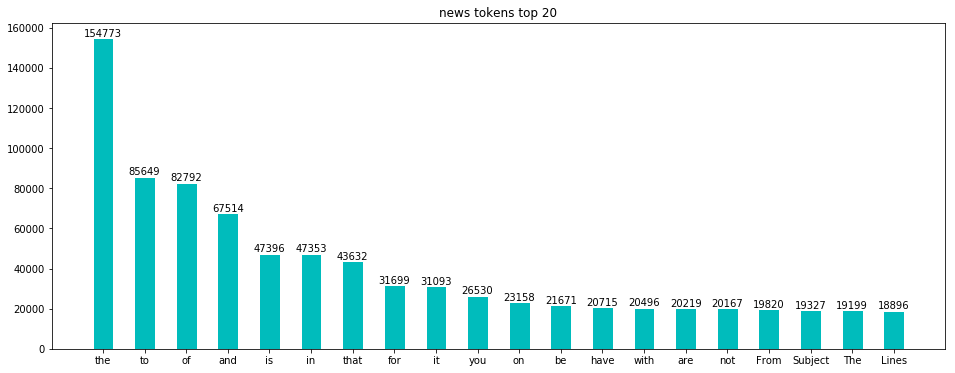

In [110]:
bar_of_news_dict(get_top_tokens(news_tokens, 20))

单词转小写


In [111]:
news_tokens = [word_tokenize(temp.lower()) for temp in news_data_clean]
number = get_numbers(news_tokens)
print('字母大小写处理：剩余特征数 ', number)
token_4 = number

[('the', 175152), ('to', 90690), ('of', 84350), ('and', 71379), ('in', 52056), ('is', 49394), ('that', 45650), ('it', 38442), ('for', 34344), ('from', 32648), ('you', 30414), ('on', 24582), ('this', 23511), ('be', 22004), ('not', 21956), ('with', 21097), ('have', 21065), ('are', 20945), ('subject', 19998), ('lines', 19446)]
字母大小写处理：剩余特征数  92984


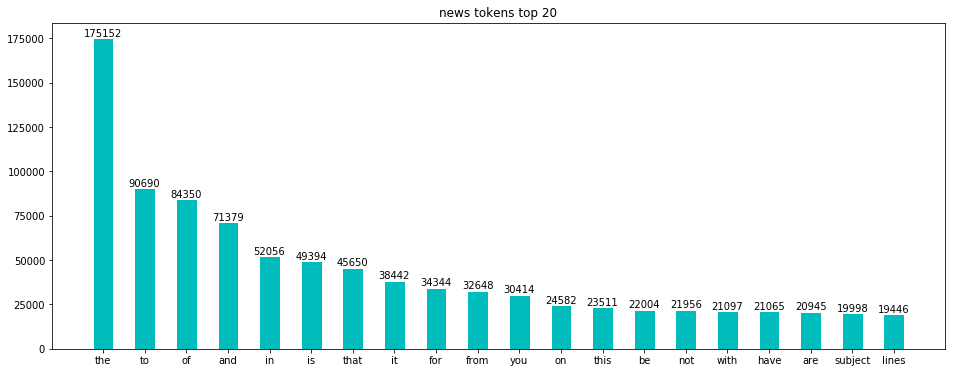

In [112]:
bar_of_news_dict(get_top_tokens(news_tokens, 20))

去掉停用词，使用nltk停用词语料库

In [113]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [114]:
news_tokens_stopwords = [[temp for temp in temp_list if stopwords_list.count(temp) == 0] for temp_list in news_tokens]
number = get_numbers(news_tokens_stopwords)
print('删除停用词后特征数： ', number)
token_5 = number

[('subject', 19998), ('lines', 19446), ('organization', 18547), ('one', 10300), ('would', 10073), ('posting', 8850), ('host', 8308), ('nntp', 8093), ('university', 7990), ('like', 6519), ('people', 6512), ('edu', 6166), ('get', 5897), ('know', 5705), ('also', 5522), ('use', 5007), ('think', 4979), ('time', 4948), ('new', 4749), ('distribution', 4501)]
删除停用词后特征数：  92840


In [115]:
#news_tokens_stopwords_v2 = [[temp for temp in temp_list if mystop_words.count(temp) == 0] for temp_list in news_tokens_stopwords]
#number_v2 = get_numbers(news_tokens_stopwords_v2)
#print('第二次 删除停用词后特征数： ', number_v2)

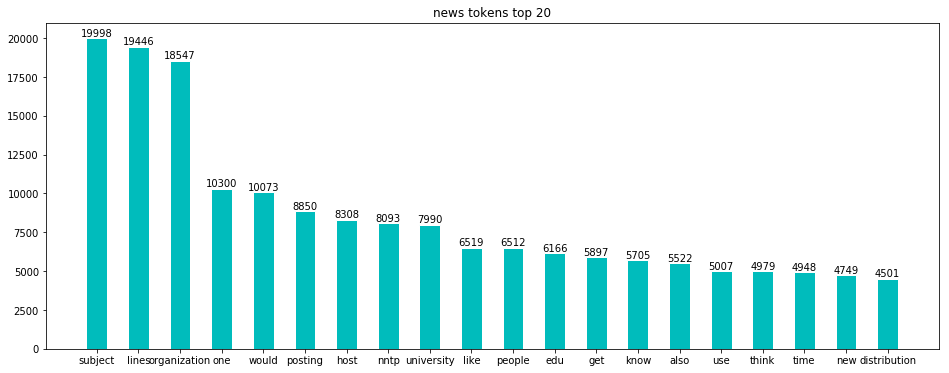

In [116]:
bar_of_news_dict(get_top_tokens(news_tokens_stopwords, 20))

In [117]:
#bar_of_news_dict(get_top_tokens(news_tokens_stopwords_v2, 20))

词根还原处理


In [118]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
lemmatizer = WordNetLemmatizer()
# 词根还原
def lemmatize(token, tag):
    if tag[0].lower() in ['n','v']:  
        return lemmatizer.lemmatize(token, tag[0].lower())  
    return token
print([lemmatize(token, tag) for token, tag in pos_tag(['the', 'went','had','women','shoes', 'at'])])

['the', 'go', 'have', 'woman', 'shoe', 'at']


In [119]:
news_tokens_tagged_corpus = [pos_tag(temp) for temp in news_tokens_stopwords]#news_tokens_stopwords_v2
news_tokens_lemmatize = [[lemmatize(token, tag) for token, tag in temp] for temp in news_tokens_tagged_corpus]

number = get_numbers(news_tokens_lemmatize)
print('词根还原后 特征数： ', number)
token_6 = number

[('line', 21181), ('subject', 20129), ('organization', 18742), ('post', 11046), ('one', 10867), ('use', 10677), ('would', 10073), ('get', 9416), ('host', 8371), ('nntp', 8093), ('university', 8054), ('say', 7874), ('know', 7339), ('make', 6915), ('go', 6717), ('like', 6655), ('people', 6575), ('think', 6371), ('edu', 6166), ('time', 6092)]
词根还原后 特征数：  84717


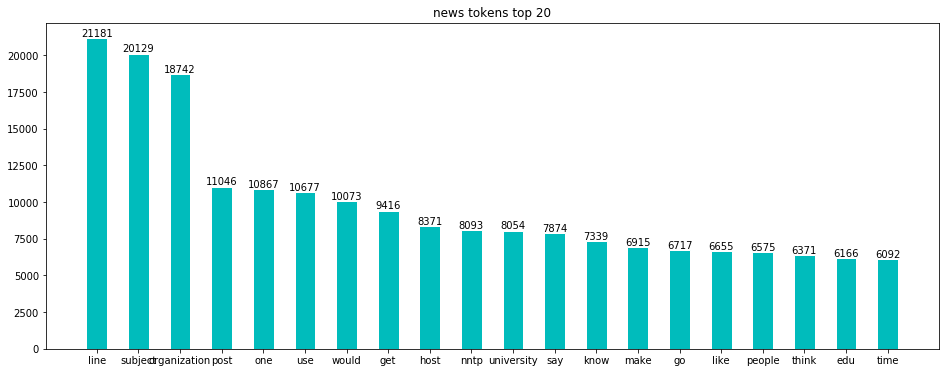

In [120]:
bar_of_news_dict(get_top_tokens(news_tokens_lemmatize, 20))

数据预处理过程，特征变换情况


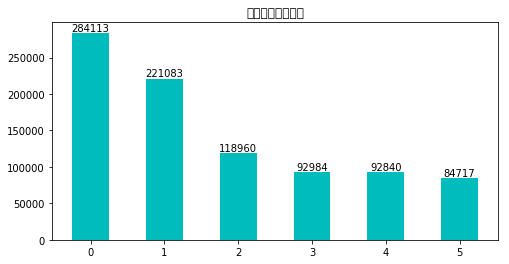

In [121]:
inputx = np.arange(6)
inputy = [token_1, token_2, token_3,token_4,token_5,token_6] #[284113, 221083, 118960,92984,92840,84717]
# 添加数据标签
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
#         print(height, rect.get_width())
        plt.text(rect.get_x()+rect.get_width()/2., height, (height), ha='center', va='bottom')
  
plt.figure(figsize=(8,4))
rect = plt.bar(inputx, inputy, 0.5, color='#00BCBC')
plt.title(u"不同新闻数量展示")
# plt.show() #如果add_labels使用后，这里 open打开后，出错
add_labels(rect)

 图中对应的处理步骤 如下：
 
 0： 开始    
 1： 删除footer，quotes 数据    
 2： 数据清理    
 3： 转小写    
 4： 去掉停用词    
 5： 词根统一    


观察发现，通过数据处理，特征数明显减少了， 变为原来的1/3 左右。

In [122]:
# all_stems = sum(news_tokens_lemmatize, [])
# stems_once = set(stem for stem in set(all_stems) if all_stems.count(stem) == 1)
# texts = [[stem for stem in text if stem not in stems_once] for text in texts_stemmed]

In [123]:
from nltk.stem.lancaster import LancasterStemmer
st = LancasterStemmer()
st.stem('stemmed')

'stem'

In [124]:
# print (news_tokens_lemmatize[0])
# texts_stemmed = [[st.stem(word) for word in docment] for docment in news_tokens_lemmatize]
# print (texts_stemmed[0])
#比较以后 不靠谱， 比较如下
# ['sure', 'bashers', 'pen', 'fan', 'pretty', 'confused', 'lack', 'kind', 'post', 'recent', 'pen', 'massacre', 'devil', 'actually', 'bit', 'puzzled', 'bit', 'relieve', 'however', 'go', 'put', 'end', 'non', 'pittsburghers', 'relief', 'bit', 'praise', 'pen', 'man', 'kill', 'devil', 'worse', 'think', 'jagr', 'show', 'much', 'better', 'regular', 'season', 'stats', 'also', 'lot', 'fo', 'fun', 'watch', 'playoff', 'bowman', 'let', 'jagr', 'lot', 'fun', 'next', 'couple', 'game', 'since', 'pen', 'go', 'beat', 'pulp', 'jersey', 'anyway', 'disappointed', 'see', 'islander', 'lose', 'final', 'regular', 'season', 'game', 'pen', 'rule']
#['sur', 'bash', 'pen', 'fan', 'pretty', 'confus', 'lack', 'kind', 'post', 'rec', 'pen', 'massacr', 'devil', 'act', 'bit', 'puzzl', 'bit', 'reliev', 'howev', 'go', 'put', 'end', 'non', 'pittsburgh', 'reliev', 'bit', 'pra', 'pen', 'man', 'kil', 'devil', 'wors', 'think', 'jagr', 'show', 'much', 'bet', 'regul', 'season', 'stat', 'also', 'lot', 'fo', 'fun', 'watch', 'playoff', 'bowm', 'let', 'jagr', 'lot', 'fun', 'next', 'coupl', 'gam', 'sint', 'pen', 'go', 'beat', 'pulp', 'jersey', 'anyway', 'disappoint', 'see', 'island', 'los', 'fin', 'regul', 'season', 'gam', 'pen', 'rul']

In [125]:
# from nltk.stem.porter import PorterStemmer
# st = PorterStemmer()
# st.stem('stemmed')
# print (news_tokens_lemmatize[0])
# texts_stemmed = [[st.stem(word) for word in docment] for docment in news_tokens_lemmatize]
# print (texts_stemmed[0])
# ['sure', 'bashers', 'pen', 'fan', 'pretty', 'confused', 'lack', 'kind', 'post', 'recent', 'pen', 'massacre', 'devil', 'actually', 'bit', 'puzzled', 'bit', 'relieve', 'however', 'go', 'put', 'end', 'non', 'pittsburghers', 'relief', 'bit', 'praise', 'pen', 'man', 'kill', 'devil', 'worse', 'think', 'jagr', 'show', 'much', 'better', 'regular', 'season', 'stats', 'also', 'lot', 'fo', 'fun', 'watch', 'playoff', 'bowman', 'let', 'jagr', 'lot', 'fun', 'next', 'couple', 'game', 'since', 'pen', 'go', 'beat', 'pulp', 'jersey', 'anyway', 'disappointed', 'see', 'islander', 'lose', 'final', 'regular', 'season', 'game', 'pen', 'rule']
# ['sure', 'basher', 'pen', 'fan', 'pretti', 'confus', 'lack', 'kind', 'post', 'recent', 'pen', 'massacr', 'devil', 'actual', 'bit', 'puzzl', 'bit', 'reliev', 'howev', 'go', 'put', 'end', 'non', 'pittsburgh', 'relief', 'bit', 'prais', 'pen', 'man', 'kill', 'devil', 'wors', 'think', 'jagr', 'show', 'much', 'better', 'regular', 'season', 'stat', 'also', 'lot', 'fo', 'fun', 'watch', 'playoff', 'bowman', 'let', 'jagr', 'lot', 'fun', 'next', 'coupl', 'game', 'sinc', 'pen', 'go', 'beat', 'pulp', 'jersey', 'anyway', 'disappoint', 'see', 'island', 'lose', 'final', 'regular', 'season', 'game', 'pen', 'rule']

# 模型分析

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(news_tokens_lemmatize, newsgroups_data.target, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# 显示切分的结果
print("Training set has {} samples.".format(len(X_train)))
print("Validation set has {} samples.".format(len(X_val)))
print("Testing set has {} samples.".format(len(X_test)))

Training set has 12060 samples.
Validation set has 3016 samples.
Testing set has 3770 samples.


数据集划分，将数据集按照1：4的比例划分，也就是1/5 = 0.2； 80%的训练数据，20%的测试数据； 训练数据中，也按照1：4划分，分成4份的训练数据和验证数据， 划分的结果如下： 训练集 12060， 验证集 3016，测试集 3770；

保存预处理的数据，免得每次从头运行代码

In [127]:
import numpy as np
# from tempfile import TemporaryFile
# outfile = TemporaryFile()
# X_train_cxsontent = TemporaryFile()
# x = np.arange(10)
# np.save(outfile, x)
# outfile.seek(0)
# np.load(outfile)
np.save('X_train.npy', X_train)
np.save("X_val.npy", X_val)
np.save("X_test.npy", X_test)

np.save("y_train.npy", y_train)
np.save("y_val.npy", y_val)
np.save("y_test.npy", y_test)

### 使用词袋子模型进行预测

加载预处理的数据

In [128]:
import numpy as np
X_train_bake = np.load("X_train.npy")
X_val_bake = np.load("X_val.npy")
X_test_bake = np.load("X_test.npy")

X_train_content = [' '.join(tmpist) for tmpist in X_train_bake]
X_val_content = [' '.join(tmpist) for tmpist in X_val_bake]
X_test_content = [' '.join(tmpist) for tmpist in X_test_bake]

y_train = np.load("y_train.npy")
y_val = np.load("y_val.npy")
y_test = np.load("y_test.npy")


定义训练，评估模型


In [132]:
from sklearn.metrics import fbeta_score, accuracy_score, log_loss
from time import time
from sklearn.externals import joblib
# 通过init_flag控制模型是新模型还是已经持久化保存后的本地模型
def com_train_predict(learner, X_train, y_train, X_val, y_val, clf_name, init_flag):
    if init_flag: # 需要训练, 训练后保存模型
        t0 = time()
        learner.fit(X_train, y_train)
        t1 = time()
        print('train_time:', round(t1 - t0, 3), 's')
        joblib.dump(learner, clf_name)
    else: #不需要训练, 直接加载已有模型
        learner = joblib.load(clf_name)
    
    # 得到在验证集上的预测值
    t0 = time()
    predictions_val = learner.predict(X_val)
    predict_proba_val = learner.predict_proba(X_val)
    t1 = time()
    
    # 计算预测用时
    print('pred_time:', round(t1 - t0, 3), 's')
    
    # 计算在验证集上的准确率
    accuracy_score_val = accuracy_score(y_val, predictions_val)
    print('accuracy_score:', accuracy_score_val)
    
    # 计算在验证集上的log_loss
    log_loss_val = log_loss(y_val, predict_proba_val)
    print('log_loss:', log_loss_val)
    
    return  accuracy_score_val, log_loss_val

使用CountVectorizer 对文本 特征进行 处理  

In [130]:
from sklearn.feature_extraction.text import CountVectorizer

countVec_train = CountVectorizer(analyzer = 'word')
X_train_countVec = countVec_train.fit_transform(X_train_content)
print(' X_train shape:', X_train_countVec.shape)
X_val_countVec = countVec_train.transform(X_val_content)
print(' X_val shape:', X_val_countVec.shape)

print(' vocabulary length:', len(countVec_train.vocabulary_))


 X_train shape: (12060, 63916)
 X_val shape: (3016, 63916)
 vocabulary length: 63916


In [133]:
# 从sklearn中分别导入 DecisionTreeClassifier， SVC， MNB 三个模型
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

# 初始化三个模型
clf_DTC = DecisionTreeClassifier()
clf_SVC = SVC(kernel='linear', probability=True)
clf_MNB = MultinomialNB()

# 进行训练
init_flag = True
#进行训练评估
print('DecisionTreeClassifier 结果如下:')
dtc_acc_countvec, dtc_loss_countvec =  com_train_predict(clf_DTC, X_train_countVec, y_train, X_val_countVec, y_val, 'clf_cntvec_dtc.pkl', init_flag)
print('SVC 结果如下:')
svc_acc_countvec, svc_loss_countvec =  com_train_predict(clf_SVC, X_train_countVec, y_train, X_val_countVec, y_val, 'clf_cntvec_svc.pkl', init_flag)
print('MultinomialNB 结果如下:')
mnb_acc_countvec, mnb_loss_countvec = com_train_predict(clf_MNB, X_train_countVec, y_train, X_val_countVec, y_val, 'clf_cntvec_mnb.pkl', init_flag)


DecisionTreeClassifier 结果如下:
train_time: 13.342 s
pred_time: 0.007 s
accuracy_score: 0.616710875331565
log_loss: 13.23833737152414
SVC 结果如下:
train_time: 266.476 s
pred_time: 32.15 s
accuracy_score: 0.7765251989389921
log_loss: 0.8916666142343332
MultinomialNB 结果如下:
train_time: 0.093 s
pred_time: 0.039 s
accuracy_score: 0.8305702917771883
log_loss: 1.895965367583531


使用TfidfVectorizer 对文本特征进行处理  

In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVec_train = TfidfVectorizer(analyzer='word')
X_train_tfidfVec = tfidfVec_train.fit_transform(X_train_content)
print(' X_train shape:', X_train_tfidfVec.shape)
X_val_tfidfVec = tfidfVec_train.transform(X_val_content)
print(' X_val shape:', X_val_tfidfVec.shape)

print(' vocabulary length', len(tfidfVec_train.vocabulary_))


 X_train shape: (12060, 63916)
 X_val shape: (3016, 63916)
 vocabulary length 63916


In [135]:
# 初始化三个模型
clf_DTC = DecisionTreeClassifier()
clf_SVC = SVC(kernel = 'linear', probability=True)
clf_MNB = MultinomialNB()

inif_flag = True

# 进行训练评估
print('DecisionTreeClassifier:')
dtc_acc_tfidfvec, dtc_loss_tfidfvec = com_train_predict(clf_DTC, X_train_tfidfVec, y_train, X_val_tfidfVec, y_val, 'clf_tfidfvec_dtc.pkl', init_flag)
print('SVC:')
svc_acc_tfidfvec, svc_loss_tfidfvec = com_train_predict(clf_SVC, X_train_tfidfVec, y_train, X_val_tfidfVec, y_val, 'clf_tfidfvec_svc.pkl', init_flag)
print('MultinomialNB:')
mnb_acc_tfidfvec, mnb_loss_tfidfvec = com_train_predict(clf_MNB, X_train_tfidfVec, y_train, X_val_tfidfVec, y_val, 'clf_tfidfvec_mnb.pkl',init_flag)

DecisionTreeClassifier:
train_time: 21.402 s
pred_time: 0.014 s
accuracy_score: 0.6021220159151194
log_loss: 13.742218724765545
SVC:
train_time: 654.052 s
pred_time: 39.591 s
accuracy_score: 0.8687002652519894
log_loss: 0.4478640514706054
MultinomialNB:
train_time: 0.087 s
pred_time: 0.029 s
accuracy_score: 0.8381962864721485
log_loss: 1.1879188736795225


 CountVectorizer 和  TfidfVectorizer 两种方式对比如下： 


In [ ]:
                        DTC        SVC          MNB    
count_accuracy_score   0.6021     0.776        0.83    
count_train_time       13.342     266.476      0.093     
count_loss             13.23      0.891        1.89   

tfidf_accuracy_score   0.60       0.868        0.838   
tfidf_train_time       21.402     654.052      0.087    
tfidf_loss             13.742     0.4478       1.1879   


Text(0.5,1,'log_loss')

<Figure size 576x288 with 0 Axes>

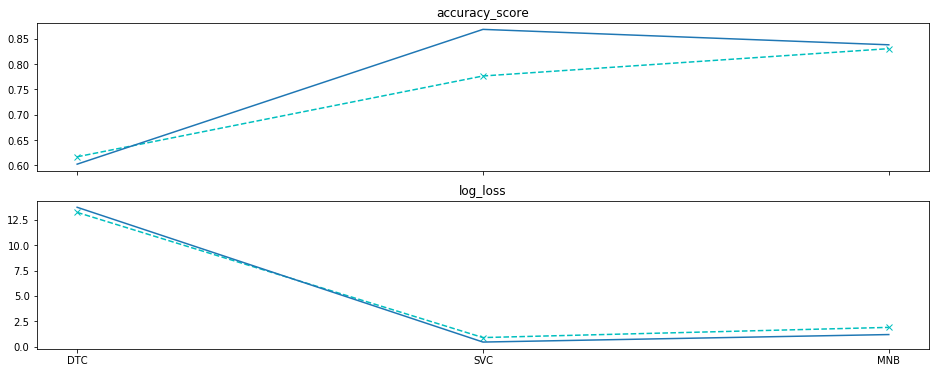

In [136]:
import matplotlib.pyplot as plt
import numpy as np
# Simple data to display in various forms
x =  ["DTC","SVC","MNB"] 
y_cntvec_acc = [dtc_acc_countvec, svc_acc_countvec, mnb_acc_countvec] 
y_tfidfvec_acc = [dtc_acc_tfidfvec, svc_acc_tfidfvec, mnb_acc_tfidfvec] 

y_cntvec_los = [dtc_loss_countvec, svc_loss_countvec, mnb_loss_countvec]
y_tfidfvec_los = [dtc_loss_tfidfvec, svc_loss_tfidfvec, mnb_loss_tfidfvec]

plt.figure(figsize=(8,4))

# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)

axarr[0].plot(x, y_cntvec_acc, 'cx--', y_tfidfvec_acc )
axarr[0].set_title('accuracy_score')

axarr[1].plot(x, y_cntvec_los, 'cx--', y_tfidfvec_los )
axarr[1].set_title('log_loss')



观察对比，发现: DTC决策树模型表现很差，loss很高，accuracy_score很低； 而svc 模型 loss很低，accuracy_score 很高，表现最好。 MNB模型比 SVC稍微差一些。 另外，采用 TfidfVectorizer【图中实线表示】 表示文本，要比 countVectorizer 【用虚线表示的】要好，tfidf的accuracy_score 要比count要高。 loss 低一些。 

对模型进行 优化


In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
# 初始化分类器
clf =MultinomialNB()#   SVC(kernel='linear', probability=True) #

# 创建进行调节的参数列表
parameters = {'alpha':( 0.001, 0.01, 0.1, 1.0, 10.0, 100.0),'fit_prior':(True,False)}
# parameters = {'alpha':( 0.01, 0.1, 1.0, 10.0, 100.0),'fit_prior':(True,False)}

# 创建一个accuracy_score打分对象
scorer = make_scorer(score_func=log_loss, greater_is_better=False, needs_proba=True)

#在分类器上使用网格搜索，使用'scorer'作为评价函数
grid_obj = GridSearchCV(estimator=clf,param_grid=parameters,scoring=scorer,n_jobs=-2,cv=10)

init_flag = True # 模型是否需要训练
clf_name = 'tfidf_best.pkl'
if init_flag:#需要训练，训练后保存模型
    t0 = time() # 获得程序开始时间
    # 用训练数据拟合网格搜索对象并找到最佳参数
    grid_obj.fit(X_train_tfidfVec, y_train)
    t1 = time() # 获得程序结束时间
    # 计算训练时间
    print('grid train_time:',round(t1 - t0, 3),"s")
    joblib.dump(grid_obj, clf_name)
else:#不需要训练，直接加载已有模型
    grid_obj = joblib.load(clf_name)

# 得到estimator
best_clf = grid_obj.best_estimator_

# 使用没有调优的模型做预测
clf = joblib.load('clf_tfidfvec_mnb.pkl')#clf_tfidfvec_svc， clf_tfidfvec_dtc，  clf_tfidfvec_mnb

predictions = clf.predict(X_val_tfidfVec)
predict_proba_val = best_clf.predict_proba(X_val_tfidfVec)
best_predictions = best_clf.predict(X_val_tfidfVec)
best_proba_val = best_clf.predict_proba(X_val_tfidfVec)

# 汇报调参前和调参后的分数
print("优化前------")
print("accuracy_score on validation data: {:.4f}".format(accuracy_score(y_val,predictions)))
print('Log_loss_val   on the validation data: {:.4f}'.format(log_loss(y_val,predict_proba_val)))

print("优化后-----")
print("accuracy_score on the validation data: {:.4f}".format(accuracy_score(y_val,best_predictions)))
# 计算在验证上的log_loss
print('log_loss_val  on the validation data: {:.4f}'.format(log_loss(y_val,best_proba_val)))

print('now best_params_:',grid_obj.best_params_)

grid train_time: 39.323 s
优化前------
accuracy_score on validation data: 0.8382
Log_loss_val   on the validation data: 0.4487
优化后-----
accuracy_score on the validation data: 0.8657
log_loss_val  on the validation data: 0.4487
now best_params_: {'alpha': 0.01, 'fit_prior': False}


使用TfidfVectorizer后， 优化结果后，   
accuracy_score 优化后，结果还是稍微提高的。    
log_loss  没有变化。   




In [ ]:
优化前-    accuracy_score    0.8382    Log_loss   0.4487    
优化后-                      0.8657               0.4487    

In [144]:
X_test_tfidfVec = tfidfVec_train.transform(X_test_content)
print(' val shape:',X_test_tfidfVec.shape)

 val shape: (3770, 63916)


In [145]:
clf = joblib.load('clf_tfidfvec_svc.pkl') 
test_predictions = clf.predict(X_test_tfidfVec)
test_proba_val = clf.predict_proba(X_test_tfidfVec)
print("Accuracy_score on test data: {:.4f}".format(accuracy_score(y_test,test_predictions)))
print('Log_loss_val on the test data: {:.4f}'.format(log_loss(y_test,test_proba_val)))

Accuracy_score on test data: 0.8615
Log_loss_val on the test data: 0.4812


In [146]:
clf = joblib.load('tfidf_best.pkl') 
test_predictions = clf.predict(X_test_tfidfVec)
test_proba_val = clf.predict_proba(X_test_tfidfVec)
print("Accuracy_score on test data: {:.4f}".format(accuracy_score(y_test,test_predictions)))
print('Log_loss_val on the test data: {:.4f}'.format(log_loss(y_test,test_proba_val)))

Accuracy_score on test data: 0.8597
Log_loss_val on the test data: 0.4665


测试数据集上，准确率达到0.75, Log_loss为0.8243,    
之前的数据是 0.7183，Log_loss为0.9529,   
对比发现，还是有所提高的。   

通过对比，优化后的SVC模型，还可以， 虽然还没达到80%，但超过了70%

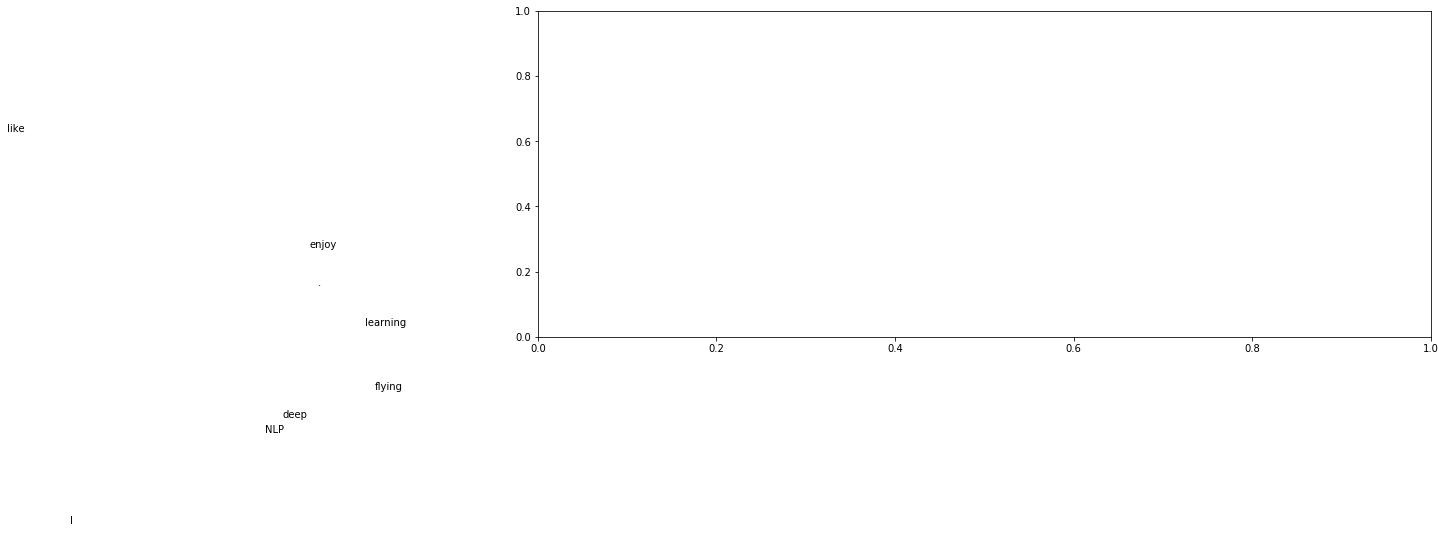

In [147]:
#For test 
import numpy as np
la = np.linalg
words = ["I", "like", "enjoy", "deep", "learning", "NLP", "flying", "."]
X = np.array ([[0,2,1,0,0,0,0,0],
               [2,0,0,1,0,1,0,0],
               [1,0,0,0,0,0,1,0],
               [0,1,0,0,1,0,0,0],
               [0,0,0,1,0,0,0,1],
               [0,1,0,0,0,0,0,1],
               [0,0,1,0,0,0,0,1],
               [0,0,0,0,1,1,1,0]])
U,s,Vh = la.svd(X, full_matrices=False)

for i in range(len(words)):
    plt.text(U[i,0], U[i,1], words[i])

------------------------------------------------------------------------------------------------------------

### 词向量模型

加载之前保存的预处理的数据

In [148]:
import numpy as np
X_train_bake = np.load("X_train.npy")
X_val_bake = np.load("X_val.npy")
X_test_bake = np.load("X_test.npy")

X_train_content = [' '.join(tmplist) for tmplist in X_train_bake]
X_val_content = [' '.join(tmplist) for tmplist in X_val_bake]
X_test_content = [' '.join(tmplist) for tmplist in X_test_bake]

y_train = np.load("y_train.npy")
y_val = np.load("y_val.npy")
y_test = np.load("y_test.npy")


y_train = np.load("y_train.npy")
y_val = np.load("y_val.npy")
y_test = np.load("y_test.npy")

采用Word2Vec方式展示文本，对文本特征进行提取

In [149]:
# 引入 word2vec
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
import gensim
from gensim.models import word2vec
EMBEDDING_DIM = 120# 词向量空间维度
model_fname = 'word2vec.model'
mode_init = True

训练后的模型保存与加载

In [150]:
if mode_init:
    sentences = []
    sentences.extend([temp.split(' ') for temp in X_train_content])
    sentences.extend([temp.split(' ') for temp in X_val_content])
    sentences.extend([temp.split(' ') for temp in X_test_content])
    newsgroups_model = word2vec.Word2Vec(sentences, size=EMBEDDING_DIM, window=5)  
    newsgroups_model.save(model_fname)
else:
    newsgroups_model = word2vec.Word2Vec.load(model_fname)

简单例子测试

In [151]:
def simple_test_word2vec(model):
    print(model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1))
    print(model.wv.doesnt_match("breakfast cereal dinner lunch".split()))
    print(model.wv.similarity('woman', 'man'))
    print(model.wv.most_similar(['man']))
simple_test_word2vec(newsgroups_model)

[('weaver', 0.7902897000312805)]
cereal
0.6838021818759299
[('son', 0.7912732362747192), ('holy', 0.7856602668762207), ('wast', 0.7843198776245117), ('spirit', 0.7764400243759155), ('father', 0.7720842361450195), ('heaven', 0.7708898782730103), ('grace', 0.7650618553161621), ('thou', 0.7628023624420166), ('lord', 0.7539628148078918), ('unto', 0.7466064691543579)]


特征提取: 单词与序号通过word_index来管理， 相应的标签采用独热向量，这里用 keras 的 to_categorical来实现

In [152]:
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
import numpy as np

all_texts = []
all_texts.extend(X_train_content)
all_texts.extend(X_val_content)
all_texts.extend(X_test_content)

all_texts_tokenizer = Tokenizer()
all_texts_tokenizer.fit_on_texts(all_texts)
all_texts_word_index = all_texts_tokenizer.word_index

print('Found %s unique all texts tokens.' % len(all_texts_word_index))

all_labels = []
all_labels.extend(y_train)
all_labels.extend(y_val)
all_labels.extend(y_test)

all_labels = to_categorical(np.asarray(all_labels))

y_train_labels = to_categorical(np.asarray(y_train))
print('Shape of train label tensor:', y_train_labels.shape)

y_val_labels = to_categorical(np.asarray(y_val))
print('Shape of val label tensor:', y_val_labels.shape)

y_test_labels = to_categorical(np.asarray(y_test))
print('Shape of test label tensor:', y_test_labels.shape)

Found 84717 unique all texts tokens.
Shape of train label tensor: (12060, 20)
Shape of val label tensor: (3016, 20)
Shape of test label tensor: (3770, 20)


In [153]:
MAX_SEQUENCE_LENGTH = 500 # 每条新闻最大长度

from keras.preprocessing.sequence import pad_sequences
X_train_sequences = pad_sequences(all_texts_tokenizer.texts_to_sequences(X_train_content), maxlen=MAX_SEQUENCE_LENGTH)
X_val_sequences = pad_sequences(all_texts_tokenizer.texts_to_sequences(X_val_content), maxlen=MAX_SEQUENCE_LENGTH)
X_test_sequences = pad_sequences(all_texts_tokenizer.texts_to_sequences(X_test_content), maxlen=MAX_SEQUENCE_LENGTH)

print('Shape of train tensor:', X_train_sequences.shape)
print('Shape of val tensor:', X_val_sequences.shape)
print('Shape of test tensor:', X_test_sequences.shape)

Shape of train tensor: (12060, 500)
Shape of val tensor: (3016, 500)
Shape of test tensor: (3770, 500)


构建嵌入层 Embedding

In [154]:
from keras.utils import plot_model
from keras.layers import Embedding
import gensim

from keras.layers import Dense, Input, Flatten, Dropout, Activation, LSTM
from keras.layers import Conv1D, MaxPooling1D, Embedding, concatenate
from keras.models import Sequential, Model

w2v_model = newsgroups_model
embedding_matrix = np.zeros((len(all_texts_word_index) + 1, EMBEDDING_DIM))

for word, i in all_texts_word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = np.asarray(w2v_model.wv[word],dtype='float32')
        
embedding_layer = Embedding(len(all_texts_word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

采用 LSTM模型 keras


In [155]:
from keras.initializers import RandomNormal
#定义模型
def init_LSTM_model(MAX_SEQUENCE_LENGTH,embedding_layer):
    model = Sequential()
    model.add(embedding_layer)
    model.add(LSTM(200, dropout=0.2, recurrent_dropout=0.2))#kernel_regularizer=RandomNormal(stddev=0.01,seed=0.1),
    model.add(Dropout(0.2))
    model.add(Dense(all_labels.shape[1], activation='softmax'))
    return model

LSTM_model = init_LSTM_model(MAX_SEQUENCE_LENGTH,embedding_layer)
LSTM_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 120)          10166160  
_________________________________________________________________
lstm_2 (LSTM)                (None, 200)               256800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                4020      
Total params: 10,426,980
Trainable params: 260,820
Non-trainable params: 10,166,160
_________________________________________________________________


In [156]:
LSTM_model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',#adam,sgd,rmsprop
              metrics=['accuracy'])

In [157]:
import h5py
model_path = 'saved_models/weights.LSTM.hdf5'
# fileok = h5py.File(model_path)
import sys
print (sys.executable)

C:\ProgramData\Anaconda2\envs\tensorflow36\python.exe


In [158]:
from keras.callbacks import ModelCheckpoint
from time import time 
init_flag = True #是否训练模型
model_path = 'saved_models/weights.LSTM.hdf5'
if init_flag:
    ### 训练模型'
    t0 = time()    
    print('starting...')
    checkpointer = ModelCheckpoint(filepath=model_path, save_best_only=True)
    history = LSTM_model.fit(X_train_sequences, y_train_labels, validation_data=(X_val_sequences, y_val_labels),
              epochs=20, batch_size=128, callbacks=[checkpointer])
    t1 = time()
    print('train_lstm_time:', round(t1 - t0, 3), 's')

starting...
Train on 12060 samples, validate on 3016 samples
Epoch 1/20
12060/12060 [==============================] - 201s 17ms/step - loss: 2.0306 - acc: 0.3240 - val_loss: 1.6400 - val_acc: 0.4234
Epoch 2/20
12060/12060 [==============================] - 192s 16ms/step - loss: 1.6070 - acc: 0.4427 - val_loss: 1.3526 - val_acc: 0.5355
Epoch 3/20
12060/12060 [==============================] - 196s 16ms/step - loss: 1.4454 - acc: 0.4999 - val_loss: 1.2912 - val_acc: 0.5388
Epoch 4/20
12060/12060 [==============================] - 194s 16ms/step - loss: 1.3236 - acc: 0.5425 - val_loss: 1.3610 - val_acc: 0.5587
Epoch 5/20
12060/12060 [==============================] - 210s 17ms/step - loss: 1.2438 - acc: 0.5718 - val_loss: 1.1223 - val_acc: 0.6111
Epoch 6/20
12060/12060 [==============================] - 206s 17ms/step - loss: 1.1745 - acc: 0.5915 - val_loss: 1.0745 - val_acc: 0.6359
Epoch 7/20
12060/12060 [==============================] - 195s 16ms/step - loss: 1.1024 - acc: 0.6244 - v

训练集和验证集的损失曲线：

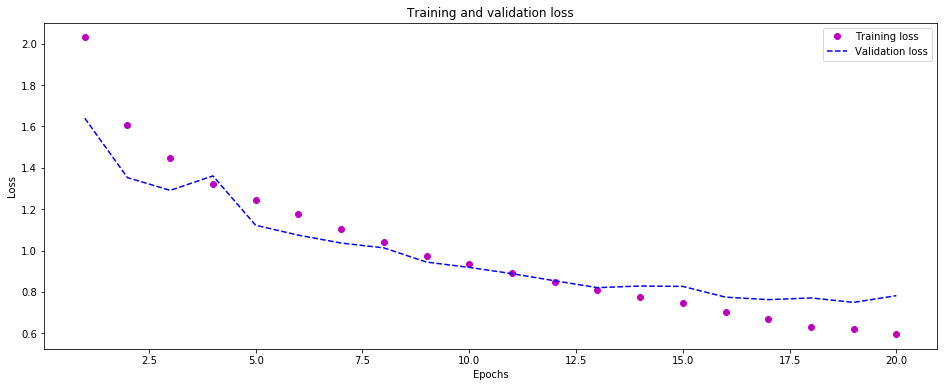

In [167]:
import matplotlib.pyplot as plt
from scipy import misc
img_path = 'LSTM_loss.png'
if init_flag:
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'mo', label='Training loss')
    plt.plot(epochs, val_loss, 'b--', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(img_path, dpi=75)
    plt.show()
else:
    image = plt.imread(img_path)
    misc.imresize(image, (450,300))
    plt.imshow(image)
    plt.axis('off') # clear x- and y-axes  
    plt.show()

训练集和验证集的正确率曲线：

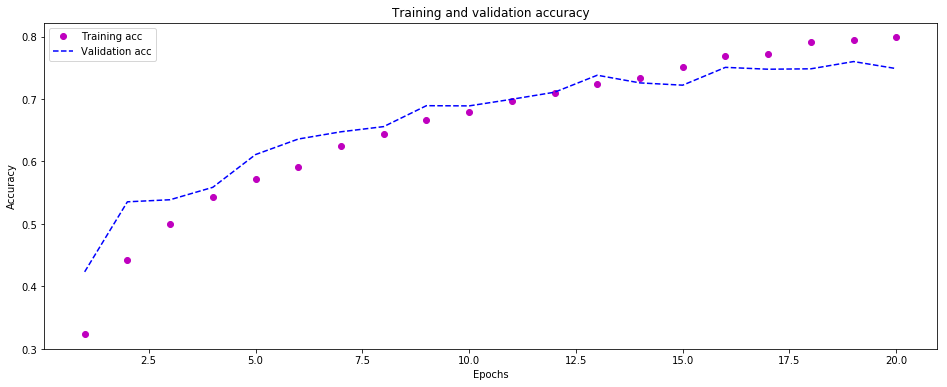

In [166]:
plt.clf()   # clear figure
plt.clf()   # clear figure
img_path = 'LSTM_acc.png'
if init_flag:
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    plt.plot(epochs, acc, 'mo', label='Training acc')
    plt.plot(epochs, val_acc, 'b--', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(img_path, dpi=75)
    plt.show()
else:
    image = plt.imread(img_path)
    misc.imresize(image, (450,300))
    plt.imshow(image)  
    plt.axis('off') # clear x- and y-axes  
    plt.show()

通过图像分析，LSTM模型在前15轮的表现很不错；accuracy_score 在测试集和验证集上在上升， 而log loss都在下降；15轮之后，验证集开始出现过拟合， loss不在明显变化。

对验证集使用LSTM进行验证

In [161]:
# 加载验证lstm 的模型权重
model_path = 'saved_models/weights.LSTM.hdf5'
LSTM_model.load_weights(model_path)
print(LSTM_model.evaluate(X_val_sequences, y_val_labels))

3016/3016 [==============================] - 18s 6ms/step
[0.7492828712618319, 0.7599469496021221]


在验证集上，accuracy_score达到了0.7599，log loss损失为0.7492

In [162]:
print(LSTM_model.evaluate(X_test_sequences, y_test_labels))

3770/3770 [==============================] - 19s 5ms/step
[0.7875605925324741, 0.7488063661426069]


在测试集上，accuracy_score 是0.7488，  log_loss为0.7875，要比测试结果低一些，硬件设备限制，没有进行其他方案的尝试， 相对来说， 这个结果还可以。

       accuracy_score      log_loss    
测试集    0.7488           0.7875    
验证集    0.7599           0.7492    

总的来说， 我们LSTM模型，在测试集的预测的结果已经达到了我们定义的的基准模型的目标 70%。